# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [20]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
tf.__version__
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


#### Load Image Data

In [21]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


/share/pkg.7/tensorflow/2.3.1/install/lib/SCC/../python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [23]:
from tensorflow import keras

# VGG19
base_model = keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model = keras.Sequential([base_model, 
                          keras.layers.Flatten(), 
                          keras.layers.Dense(256, activation='relu', name='dense_feature'), 
                          keras.layers.Dropout(rate=0.2),
                          keras.layers.Dense(4, activation='softmax')
])


# Xception
base_model2 = keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model2.trainable = False
model2 = keras.Sequential([base_model2, 
                          keras.layers.Flatten(), 
                          keras.layers.Dense(256, activation='relu', name='dense_feature'), 
                           keras.layers.Dropout(rate=0.2), 
                           keras.layers.Dense(4, activation='softmax')
])

# Compile
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=LEARNING_RATE), metrics=['acc'])
model.summary()

model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=LEARNING_RATE), metrics=['acc'])
model2.summary()


83689472/83683744 [==============================] - 1s 0us/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               6422784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 1028      
Total params: 26,448,196
Trainable params: 6,423,812
Non-trainable params: 20,024,384
_________________________________________________________________
Model: "sequential_7"
_____________

#### [5 points] Train Model

In [24]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

fitted = model.fit_generator(train_batches, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_batches, validation_steps=STEP_SIZE_VALID, epochs=NUM_EPOCHS)
fitted2 = model2.fit_generator(train_batches, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_batches, validation_steps=STEP_SIZE_VALID, epochs=NUM_EPOCHS)

22
6
Epoch 1/100
21/21 [==============================] - 5s 226ms/step - loss: 1.6315 - acc: 0.3447 - val_loss: 1.2552 - val_acc: 0.4400
Epoch 2/100
21/21 [==============================] - 4s 208ms/step - loss: 1.2782 - acc: 0.4029 - val_loss: 1.0264 - val_acc: 0.6000
Epoch 3/100
21/21 [==============================] - 4s 204ms/step - loss: 1.1825 - acc: 0.4757 - val_loss: 1.0828 - val_acc: 0.4200
Epoch 4/100
21/21 [==============================] - 4s 207ms/step - loss: 1.0749 - acc: 0.4854 - val_loss: 0.9261 - val_acc: 0.6800
Epoch 5/100
21/21 [==============================] - 4s 205ms/step - loss: 1.0542 - acc: 0.5437 - val_loss: 0.8920 - val_acc: 0.6400
Epoch 6/100
21/21 [==============================] - 4s 204ms/step - loss: 0.9247 - acc: 0.5388 - val_loss: 0.9366 - val_acc: 0.5800
Epoch 7/100
21/21 [==============================] - 4s 212ms/step - loss: 1.0150 - acc: 0.5583 - val_loss: 0.8995 - val_acc: 0.5800
Epoch 8/100
21/21 [==============================] - 4s 209ms/st

#### [5 points] Plot Accuracy and Loss During Training

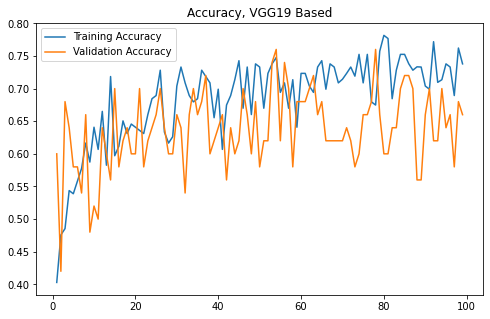

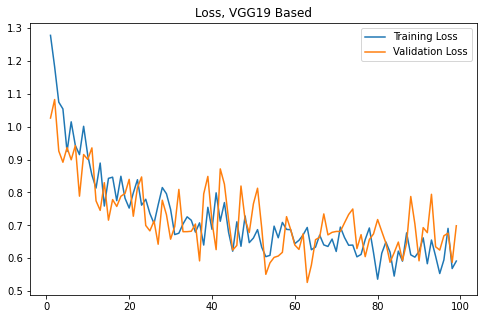

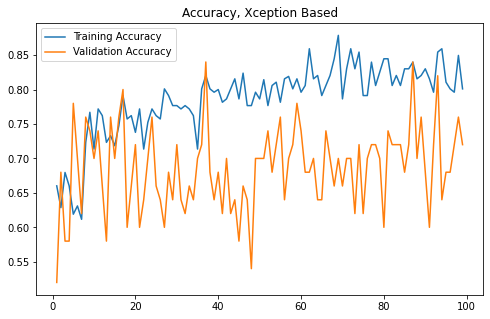

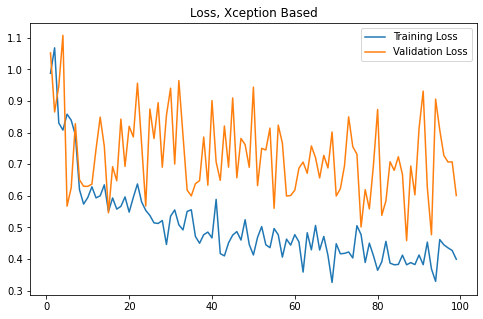

In [26]:
import matplotlib.pyplot as plt

acc = fitted.history['acc']
loss = fitted.history['loss']
val_acc = fitted.history['val_acc']
val_loss = fitted.history['val_loss']

# accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1,NUM_EPOCHS), acc[1:], label='Training Accuracy')
plt.plot(np.arange(1,NUM_EPOCHS), val_acc[1:], label='Validation Accuracy')
plt.title('Accuracy, VGG19 Based')
plt.legend()
plt.show()

# loss plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1,NUM_EPOCHS), loss[1:], label='Training Loss')
plt.plot(np.arange(1,NUM_EPOCHS), val_loss[1:], label='Validation Loss')
plt.title('Loss, VGG19 Based')
plt.legend()
plt.show()



acc2 = fitted2.history['acc']
loss2 = fitted2.history['loss']
val_acc2 = fitted2.history['val_acc']
val_loss2 = fitted2.history['val_loss']

# accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1,NUM_EPOCHS), acc2[1:], label='Training Accuracy')
plt.plot(np.arange(1,NUM_EPOCHS), val_acc2[1:], label='Validation Accuracy')
plt.title('Accuracy, Xception Based')
plt.legend()
plt.show()

# loss plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1,NUM_EPOCHS), loss2[1:], label='Training Loss')
plt.plot(np.arange(1,NUM_EPOCHS), val_loss2[1:], label='Validation Loss')
plt.title('Loss, Xception Based')
plt.legend()
plt.show()

#### Testing Model

In [27]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss for VGG16:' , x[0])
print('Test accuracy for VGG16:',x[1])

# for ResNet Model
eval_generator.reset()
print(len(eval_generator))
x2 = model2.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss for Xception:' , x2[0])
print('Test accuracy for Xception:',x2[1])

Found 36 images belonging to 4 classes.
36
36/36 [==============================] - 1s 14ms/step - loss: 0.8207 - acc: 0.5833
Test loss for VGG16: 0.8206884264945984
Test accuracy for VGG16: 0.5833333134651184
36
36/36 [==============================] - 0s 13ms/step - loss: 0.4808 - acc: 0.7778
Test loss for ResNet: 0.48077499866485596
Test accuracy for ResNet: 0.7777777910232544


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.


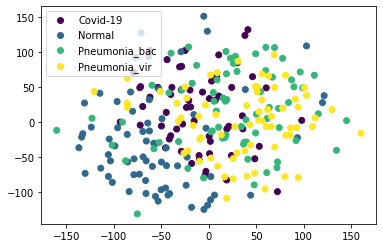

Found 270 images belonging to 4 classes.


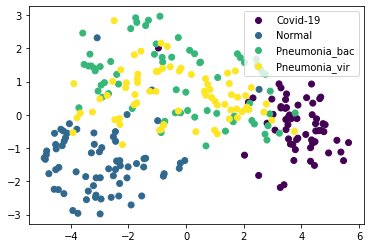

In [42]:
from sklearn.manifold import TSNE

intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                        outputs=model.get_layer('dense_feature').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")

y_true = tsne_eval_generator.classes

# Compile
intermediate_layer_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=LEARNING_RATE), metrics=['acc'])

features = intermediate_layer_model.predict(tsne_eval_generator)

tsne = TSNE(n_components=4, method='exact', n_jobs=-1, perplexity=30, learning_rate=175, n_iter=3500).fit_transform(features)

my_label = ['Covid-19', 'Normal', 'Pneumonia_bac', 'Pneumonia_vir']

scatter = plt.scatter(tsne[:,0], tsne[:,1], c=y_true)
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, my_label)
plt.show()







# For Xception
intermediate_layer_model2 = tf.keras.Model(inputs=model2.input,
                                        outputs=model2.get_layer('dense_feature').output)

tsne_eval_generator2 = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")

y_true2 = tsne_eval_generator2.classes

# Compile
intermediate_layer_model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=LEARNING_RATE), metrics=['acc'])

features2 = intermediate_layer_model2.predict(tsne_eval_generator2)

tsne2 = TSNE(n_components=4, method='exact', n_jobs=-1, perplexity=30, learning_rate=40, n_iter=3500).fit_transform(features2)

my_label2 = ['Covid-19', 'Normal', 'Pneumonia_bac', 'Pneumonia_vir']

scatter2 = plt.scatter(tsne2[:,0], tsne2[:,1], c=y_true2)
handles2, _ = scatter.legend_elements(prop='colors')
plt.legend(handles2, my_label2)
plt.show()





<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->